In [1]:
import pandas as pd
file_path = "TMDB_movie_dataset.csv"
df = pd.read_csv(file_path)
df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


# Data Cleaning

In [3]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

duplicates = df.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicates)

Missing Values:
 id                            0
title                        13
vote_average                  0
vote_count                    0
status                        0
release_date             210165
revenue                       0
runtime                       0
adult                         0
backdrop_path            878533
budget                        0
homepage                1065307
imdb_id                  575099
original_language             0
original_title               13
overview                 248755
popularity                    0
poster_path              386015
tagline                 1023888
genres                   486956
production_companies     658939
production_countries     538244
spoken_languages         517887
keywords                 874538
dtype: int64

Number of Duplicate Rows: 370


In [5]:
df = df.drop_duplicates()

In [7]:
df = df.drop(columns=["backdrop_path", "homepage", "tagline", "keywords"])

In [9]:
df = df.dropna(subset=["title", "release_date", "original_language", "genres"])

In [11]:
df["runtime"] = df["runtime"].fillna(df["runtime"].median())
df["overview"] = df["overview"].fillna("No description available")

In [13]:
df[["genres", "production_companies", "production_countries", "spoken_languages"]] = \
    df[["genres", "production_companies", "production_countries", "spoken_languages"]].fillna("Unknown")

In [17]:
df = df.dropna(subset=["imdb_id", "poster_path"])

In [19]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

duplicates = df.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicates)

Missing Values:
 id                      0
title                   0
vote_average            0
vote_count              0
status                  0
release_date            0
revenue                 0
runtime                 0
adult                   0
budget                  0
imdb_id                 0
original_language       0
original_title          0
overview                0
popularity              0
poster_path             0
genres                  0
production_companies    0
production_countries    0
spoken_languages        0
dtype: int64

Number of Duplicate Rows: 0


In [21]:
df.to_csv("tmdb_cleaned_dataset.csv", index=False)

In [97]:
def extract_first_genre(genre_string):
    """Extracts the first genre from a comma-separated string."""
    if isinstance(genre_string, str) and genre_string.strip(): 
        return genre_string.split(", ")[0] 
    return "Unknown"

df["main_genre"] = df["genres"].apply(extract_first_genre)

In [25]:
print(df["main_genre"].value_counts().head(10))

main_genre
Drama          102168
Comedy          63746
Documentary     59791
Horror          20658
Action          20166
Animation       18996
Romance         12069
Thriller        11564
Crime           11007
Music            8522
Name: count, dtype: int64


In [35]:
print(df["production_companies"].head(10))
print(type(df["production_companies"][0])) 

0    Legendary Pictures, Syncopy, Warner Bros. Pict...
1    Legendary Pictures, Syncopy, Lynda Obst Produc...
2    DC Comics, Legendary Pictures, Syncopy, Isobel...
3    Dune Entertainment, Lightstorm Entertainment, ...
4                                       Marvel Studios
5    20th Century Fox, The Donners' Company, Genre ...
6                                       Marvel Studios
7    Regency Enterprises, Fox 2000 Pictures, Taurus...
8                                       Marvel Studios
9                  Miramax, A Band Apart, Jersey Films
Name: production_companies, dtype: object
<class 'str'>


In [95]:
def extract_first_pc(pc_string):
    """Extracts the first genre from a comma-separated string."""
    if isinstance(pc_string, str) and pc_string.strip():
        return pc_string.split(", ")[0]
    return "Unknown"

df["main_production_company"] = df["production_companies"].apply(extract_first_pc)

In [39]:
print(df["main_production_company"].value_counts().head(10))

main_production_company
Unknown                  110650
Columbia Pictures          1883
Metro-Goldwyn-Mayer        1877
Paramount                  1865
Warner Bros. Pictures      1772
Universal Pictures         1646
BBC                        1267
ONF | NFB                  1188
Toei Company               1159
Mosfilm                    1076
Name: count, dtype: int64


In [47]:

df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")
df["release_year"] = df["release_date"].dt.year

df["profit"] = df["revenue"] - df["budget"]

df["success_score"] = df["profit"] / df["budget"]

# Data Visualization

## Budget vs Revenue

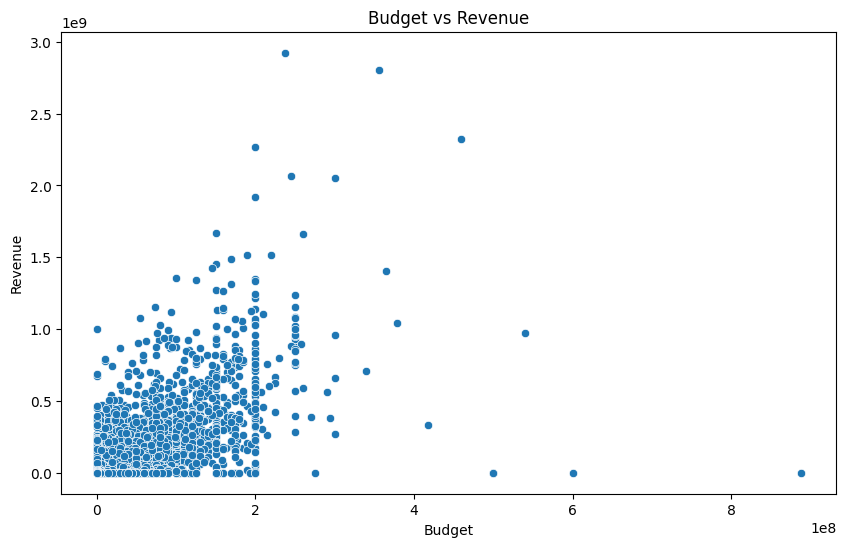

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["budget"], y=df["revenue"])
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.title("Budget vs Revenue")
plt.show()


## Top 10 Most Popular Movie Genres

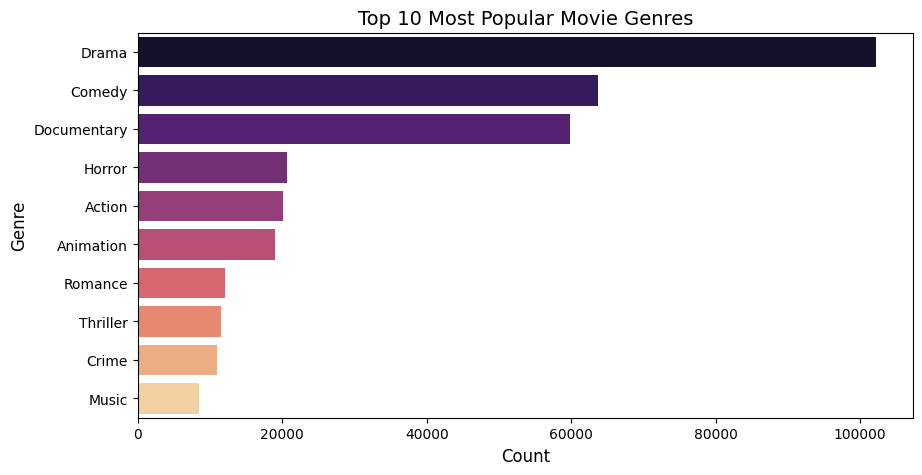

In [85]:
top_genres = df["main_genre"].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_genres.values, y=top_genres.index, palette="magma", hue=top_genres.index, legend=False)

plt.xlabel("Count", fontsize=12)
plt.ylabel("Genre", fontsize=12)
plt.title("Top 10 Most Popular Movie Genres", fontsize=14)

plt.show()

## Trends in Movie Release Dates & Revenue

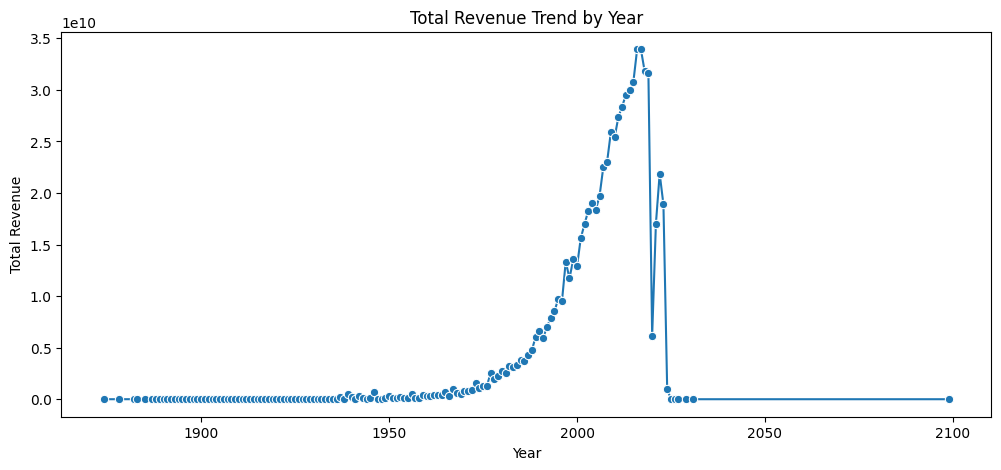

In [54]:
yearly_revenue = df.groupby("release_year")["revenue"].sum()

plt.figure(figsize=(12, 5))
sns.lineplot(x=yearly_revenue.index, y=yearly_revenue.values, marker="o")
plt.title("Total Revenue Trend by Year")
plt.xlabel("Year")
plt.ylabel("Total Revenue")
plt.show()

##  Relationship Between Budget, Revenue & Popularity

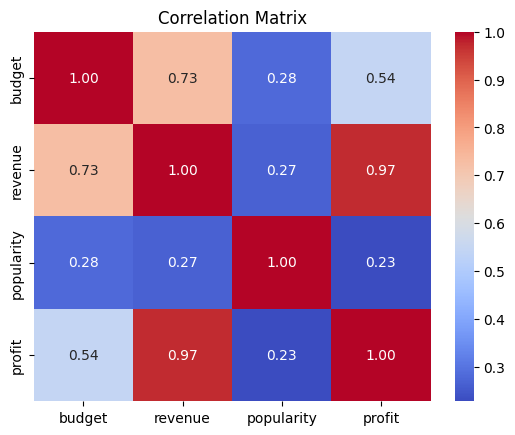

In [61]:
df["profit"] = df["revenue"] - df["budget"]
correlation_matrix = df[['budget', 'revenue', 'popularity', 'profit']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

## Popularity of Movie Genres Over Time

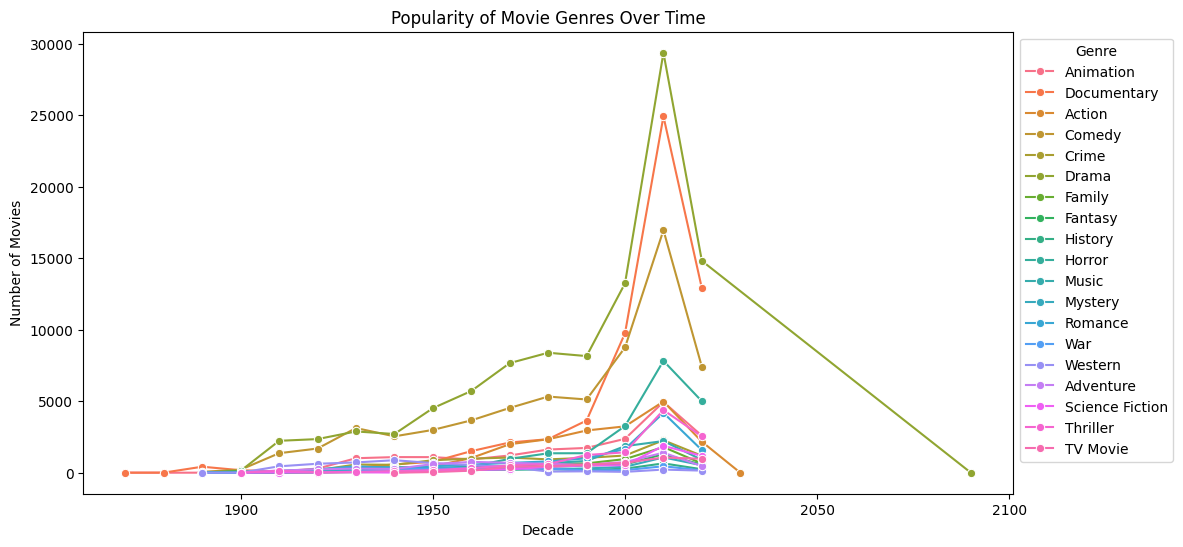

In [64]:
df['decade'] = (df['release_year'] // 10) * 10
genre_trends = df.groupby(['decade', 'main_genre']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.lineplot(data=genre_trends, x='decade', y='count', hue='main_genre', marker="o")
plt.title("Popularity of Movie Genres Over Time")
plt.xlabel("Decade")
plt.ylabel("Number of Movies")
plt.legend(title="Genre", bbox_to_anchor=(1,1))
plt.show()


## Identify Successful Production Companies

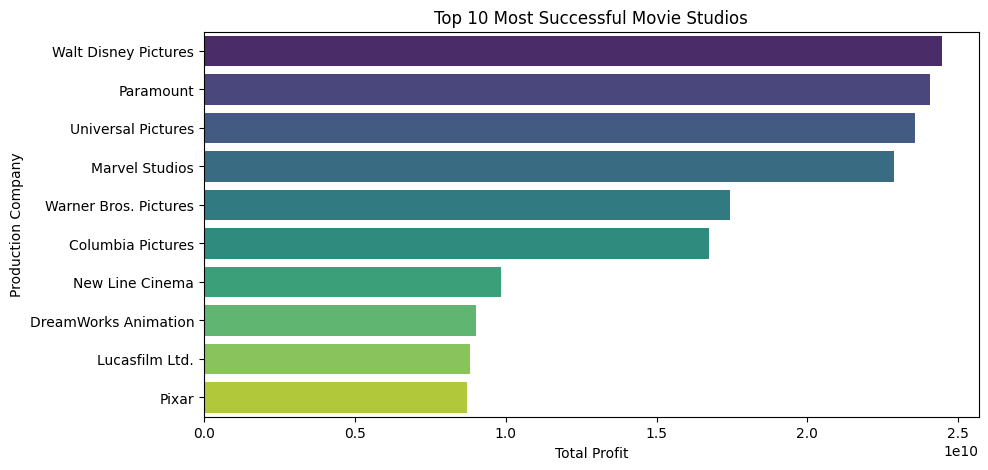

In [69]:
top_companies = df.groupby("main_production_company")["profit"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_companies.values, y=top_companies.index, palette="viridis", hue=top_companies.index, legend=False)
plt.xlabel("Total Profit")
plt.ylabel("Production Company")
plt.title("Top 10 Most Successful Movie Studios")
plt.show()


## Top 10 Revenue-Generated Movies

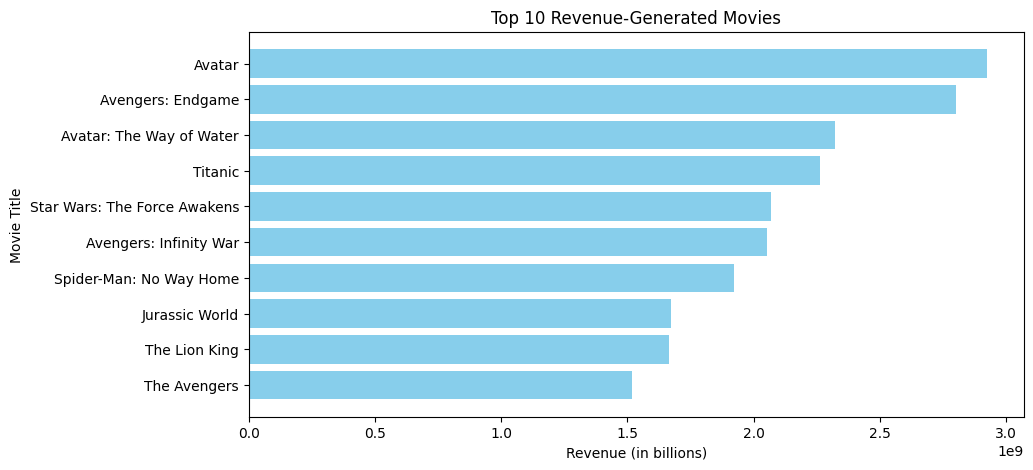

In [93]:
top_revenue_movies = df[['title', 'revenue']].sort_values(by='revenue', ascending=False).head(10)

plt.figure(figsize=(10, 5))
plt.barh(top_revenue_movies['title'], top_revenue_movies['revenue'], color='skyblue')
plt.xlabel("Revenue (in billions)")
plt.ylabel("Movie Title")
plt.title("Top 10 Revenue-Generated Movies")
plt.gca().invert_yaxis() 
plt.show()